In [11]:
#!pip install plotly

In [1]:
# Import Python Package
import pandas as pd
import numpy as np
import seaborn as sns
import os
import cv2
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
#import tensorflow as tf
#from tensorflow.keras import layers, models
from plotly.subplots import make_subplots
#from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
#from tensorflow.keras.models import Model
from PIL import Image
import plotly.offline as pyo
from IPython.display import display
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [2]:
import matplotlib.pyplot as plt

def extractImg(path):
    # Iterate over all subdirectories in the main directory
    images = []
   
    # Iterate over all files in the add images to the list
    for filename in os.listdir(path):
        img_path = os.path.join(path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images


'''
# Create a bar chart to visualize the distribution
plt.bar(subdirectories, counts)
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.show()
'''

def getandprintNumberofImges(path,sux = ""):
    #create a map key value pair
    map = {}

    # Iterate over each subdirectory
    for dirpath, dirnames, filenames in os.walk(path):
        num_images = 0
        # Count the number of image files in the current subdirectory
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                num_images += 1

        # Print the number of image files in the current subdirectory
        print(f"Found {num_images} images in directory: {dirpath}")
        #get just the last part of the path
        name =sux + dirpath.split("\\")[-1]
        #add the name and the number of images to the map
        if num_images > 0:
            map[name] = num_images
    return map
        
        
            
            
            


In [3]:
import os
import cv2

# Path to the working directory
#path_to_main_directory = os.path.join(os.getcwd(), 'data')
path_to_main_directory =  os.path.join(os.path.dirname(os.path.dirname(os.path.join(os.getcwd()))), 'dataset','ai4mars-dataset-merged-0.3','msl')
path_to_images = os.path.join(path_to_main_directory, 'images')
path_to_label = os.path.join(path_to_main_directory, 'labels')

path_to_images_train = os.path.join(path_to_images,'edr')
path_to_label_train = os.path.join(path_to_label,'train')
path_to_label_test = os.path.join(path_to_label,'test')

print(path_to_images_train)
#images = extractImg(path_to_imge_train)
dic1 = getandprintNumberofImges(path_to_images)
dic2 = getandprintNumberofImges(path_to_label_train,"label_")
dic3 = getandprintNumberofImges(path_to_label_test,"label_")

#create a nwe dic combining the 3 dic
dic = {**dic1, **dic2, **dic3}
print(dic)

d:\Universita\Master_Thesis\AutonomousDrivingOnMars\dataset\ai4mars-dataset-merged-0.3\msl\images\edr
Found 0 images in directory: d:\Universita\Master_Thesis\AutonomousDrivingOnMars\dataset\ai4mars-dataset-merged-0.3\msl\images
Found 18127 images in directory: d:\Universita\Master_Thesis\AutonomousDrivingOnMars\dataset\ai4mars-dataset-merged-0.3\msl\images\edr
Found 18097 images in directory: d:\Universita\Master_Thesis\AutonomousDrivingOnMars\dataset\ai4mars-dataset-merged-0.3\msl\images\mxy
Found 18096 images in directory: d:\Universita\Master_Thesis\AutonomousDrivingOnMars\dataset\ai4mars-dataset-merged-0.3\msl\images\rng-30m
Found 16064 images in directory: d:\Universita\Master_Thesis\AutonomousDrivingOnMars\dataset\ai4mars-dataset-merged-0.3\msl\labels\train
Found 0 images in directory: d:\Universita\Master_Thesis\AutonomousDrivingOnMars\dataset\ai4mars-dataset-merged-0.3\msl\labels\test
Found 322 images in directory: d:\Universita\Master_Thesis\AutonomousDrivingOnMars\dataset\ai

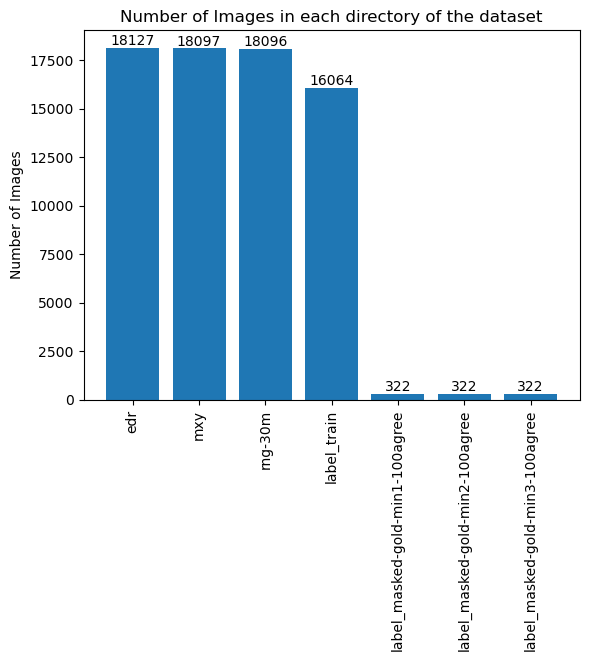

In [4]:
# Create a bar chart to visualize the distribution
plt.bar(dic.keys(), dic.values())
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
#set the title
plt.title("Number of Images in each directory of the dataset")
#write the numebr of images on top of the bar
for key, value in dic.items():
    plt.text(key, value, str(value), ha = 'center', va = 'bottom')
plt.show()

In [16]:
!pip install --upgrade pip
!pip install pip install ipykernel
!pip install --upgrade nbformat


  Using cached pip-24.1.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
d:\AnacondaEnvs\gpu_2\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import plotly.express as px
import os


# List to store file sizes
sizes = []

# Iterate over each file in the root directory and its subdirectories
for dirpath, dirnames, filenames in os.walk(path_to_images_train):
    for filename in filenames:
        # Get the full path of the file
        file_path = os.path.join(dirpath, filename)
        # Get the file size in bytes
        file_size = os.path.getsize(file_path)
        # Convert file size to MB and add to the list
        sizes.append(file_size / 1_000_000)
print (sizes)
#create a plot with plotly
fig = px.histogram(x=sizes, nbins=40, labels={'x': 'File Size (MB)', 'y': 'Number of Images'})
# Customize the plot
fig.update_layout(
    xaxis_title="File Size (MB)",
    yaxis_title="Number of Images",
    showlegend=False,
    bargap=0.1,
    bargroupgap=0.1
)
fig.show()
mean_size = np.mean(sizes)
std_size = np.std(sizes)
print(f"Mean file size: {mean_size:.2f} MB")
print(f"Standard deviation of file size: {std_size:.2f} MB")


[0.026711, 0.020162, 0.300282, 0.330116, 0.334057, 0.312357, 0.332961, 0.402923, 0.362496, 0.271991, 0.194357, 0.151061, 0.138835, 0.205692, 0.249829, 0.23852, 0.289647, 0.297327, 0.373933, 0.422284, 0.451267, 0.434393, 0.413546, 0.259608, 0.243773, 0.20874, 0.235906, 0.218059, 0.203709, 0.233451, 0.227659, 0.225288, 0.186965, 0.210565, 0.185229, 0.207141, 0.207102, 0.391263, 0.209625, 0.215143, 0.211392, 0.22652, 0.397662, 0.3883, 0.251237, 0.242415, 0.242839, 0.301882, 0.239617, 0.310903, 0.269977, 0.262531, 0.268486, 0.307129, 0.455102, 0.455762, 0.487604, 0.491721, 0.480148, 0.33931, 0.197557, 0.206682, 0.285963, 0.364825, 0.373887, 0.371101, 0.298683, 0.248032, 0.243451, 0.245629, 0.229104, 0.249056, 0.416456, 0.244188, 0.322352, 0.447631, 0.213377, 0.219788, 0.217707, 0.2117, 0.212351, 0.319619, 0.327042, 0.351418, 0.471828, 0.483333, 0.373394, 0.327107, 0.355653, 0.359644, 0.34498, 0.400721, 0.33611, 0.364596, 0.414821, 0.423797, 0.383076, 0.39839, 0.325693, 0.230449, 0.190244, 

Mean file size: 0.33 MB
Standard deviation of file size: 0.07 MB


In [19]:
import os
import cv2
import numpy as np


sizes = []
resolutions = []
color_distributions = []

# Iterate over each image file in each subdirectory
for dirpath, dirnames, filenames in os.walk(path_to_images_train):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Load the image file using OpenCV
            img_path = os.path.join(dirpath, filename)
            img = cv2.imread(img_path)

            # Extract the size of the image
            size = os.path.getsize(img_path)
            sizes.append(size)

            # Extract the resolution of the image
            resolution = img.shape[:2]
            resolutions.append(resolution)

            # Extract the color distribution of the image
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

In [ ]:
import plotly.graph_objects as go

# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Create a bar chart of the mean color distribution
fig = go.Figure(
    go.Bar(x=np.arange(256), y=mean_color_distribution, name="Mean Color Distribution")
)

# Set the title and axis labels
fig.update_layout(
    title="Mean Pixel Distribution of images",
    xaxis_title="Pixel Value",
    yaxis_title="Number of Pixels"
)

# Show the plot
fig.show()


[[ 219549 1563987 1289220 ...       0       0       0]
 [      0       0       0 ...   15828   15696 2741337]
 [     51     768    5841 ...     423     258     495]
 ...
 [      0       0       0 ...      12      27      15]
 [      0       0       0 ...       0       0       0]
 [      0       0       3 ...       0       0       0]]


In [5]:
import plotly.express as px
import os


# List to store file sizes
sizes = []

# Iterate over each file in the root directory and its subdirectories
for dirpath, dirnames, filenames in os.walk(path_to_label):
    for filename in filenames:
        # Get the full path of the file
        file_path = os.path.join(dirpath, filename)
        # Get the file size in bytes
        file_size = os.path.getsize(file_path)
        # Convert file size to MB and add to the list
        sizes.append(file_size / 1_000_000)
print (sizes)
#create a plot with plotly
fig = px.histogram(x=sizes, nbins=40, labels={'x': 'File Size (MB)', 'y': 'Number of Images'})
# Customize the plot
fig.update_layout(
    xaxis_title="File Size (MB)",
    yaxis_title="Number of Images",
    showlegend=False,
    bargap=0.1,
    bargroupgap=0.1
)
fig.show()
mean_size = np.mean(sizes)
std_size = np.std(sizes)
print(f"Mean file size: {mean_size:.2f} MB")
print(f"Standard deviation of file size: {std_size:.2f} MB")

[0.016671, 0.013092, 0.014621, 0.017865, 0.004519, 0.003916, 0.005647, 0.008983, 0.004177, 0.006387, 0.00816, 0.004158, 0.005794, 0.006019, 0.003921, 0.004825, 0.003711, 0.005139, 0.004457, 0.003539, 0.004047, 0.004538, 0.00469, 0.007077, 0.006338, 0.004609, 0.004126, 0.00378, 0.00382, 0.004385, 0.005272, 0.004445, 0.01234, 0.015644, 0.006265, 0.005758, 0.004049, 0.007755, 0.004946, 0.007476, 0.003739, 0.004777, 0.004145, 0.006149, 0.00775, 0.004503, 0.006533, 0.00562, 0.006596, 0.006719, 0.007574, 0.005461, 0.004083, 0.004993, 0.0052, 0.005889, 0.006021, 0.004486, 0.005328, 0.00415, 0.003518, 0.003668, 0.00523, 0.003762, 0.00543, 0.003241, 0.004744, 0.004121, 0.003232, 0.00383, 0.003576, 0.003201, 0.003673, 0.00656, 0.003208, 0.004118, 0.004354, 0.003851, 0.003219, 0.003366, 0.004157, 0.005248, 0.005437, 0.003195, 0.00388, 0.003187, 0.003274, 0.003247, 0.003791, 0.004839, 0.006577, 0.005267, 0.005648, 0.007973, 0.004425, 0.005786, 0.006186, 0.005522, 0.005954, 0.004368, 0.005601, 0.00

Mean file size: 0.01 MB
Standard deviation of file size: 0.00 MB


In [8]:
print(f"Mean file size: {(mean_size*1000):.4f} kB")
print(f"Standard deviation of file size: {std_size*1000:.4f} kB")

Mean file size: 6.4586 kB
Standard deviation of file size: 2.8089 kB


In [64]:
import os
import cv2
import numpy as np


sizes = []
resolutions = []
color_distributions = []

# Iterate over each image file in each subdirectory
for dirpath, dirnames, filenames in os.walk(path_to_label):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Load the image file using OpenCV
            img_path = os.path.join(dirpath, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Extract the size of the image
            size = os.path.getsize(img_path)
            sizes.append(size)

            # Extract the resolution of the image
            resolution = img.shape[:2]
            resolutions.append(resolution)

            # Extract the color distribution of the image
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)


In [63]:
print(len(color_distributions))
print(color_distributions)
#chreat a cout of elemnt in the color distribution that ha a value greater than 0 in firt position
n_soil,n_brock,n_sand,n_rock,n_bk = 0,0,0,0,0
for i in range(len(color_distributions)):
    if color_distributions[i][0] > 0:
        n_soil += 1
    if color_distributions[i][1] > 0:
        n_brock += 1
    if color_distributions[i][2] > 0:
        n_sand += 1
    if color_distributions[i][3] > 0:
        n_rock += 1
    if color_distributions[i][255] > 0:
        n_bk+=1
        
print(n_soil,n_brock,n_sand,n_rock,n_bk)
        
#list of the number of elemnt in the color distribution that ha a value greater than 0 in firt position
counts = [n_soil,n_brock,n_sand,n_rock,n_bk]


17030
[[  14136  334190   90447 ...       0       0  609803]
 [ 153142  798870       0 ...       0       0   96564]
 [ 119767  206840   63824 ...       0       0  658145]
 ...
 [      0       0       0 ...       0       0 1048576]
 [      0       0       0 ...       0       0 1048576]
 [      0       0       0 ...       0       0 1048576]]
8507 10886 5813 2304 17030


In [60]:
sum_colors = np.sum(color_distributions, axis=0)
#print(sum_colors)
sum_colors_cleand = sum_colors[0:4]
sum_colors_cleand = np.append(sum_colors_cleand, sum_colors[-1])
print(sum_colors_cleand)


[3714545901 4791786478 1239993686   86815188 8024108027]


In [61]:
import plotly.graph_objects as go

# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Create a bar chart of the mean color distribution
fig = go.Figure(
    go.Bar(x=np.arange(256), y=sum_colors, name="Mean Color Distribution")
)

# Set the title and axis labels
fig.update_layout(
    title="Mean Pixel Distribution of images",
    xaxis_title="Pixel Value",
    yaxis_title="Number of Pixels"
)

# Show the plot
fig.show() 

In [62]:
#pie chart
fig = px.pie(values=sum_colors_cleand, names=['0', '1', '2', '3', '255'], title='Pixel Distribution of labels',)
#set legend_title
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [75]:
names=['soil', 'bedrock', 'sand', 'Big Rock', 'background']
# Create a bar chart of the mean color distribution
fig = go.Figure(
    go.Bar(x=names, y=counts, name="Mean Color Distribution")
)
 # use different colors for the bars
colors = ['blue', 'green', 'orange', 'red', 'black']
fig.update_traces(marker_color=colors)

# Set the title and axis labels
fig.update_layout(
    title="Number of imgaes with each label")

# Show the plot
fig.show() 


In [ ]:
#pie chart
fig = px.pie(values=sum_colors_cleand, names=['0', '1', '2', '3', '255'], title='Pixel Distribution of labels',)
#set legend_title
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()